# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 412 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(f'Shape: {df_data.shape}')
df_data.head()

Shape: (962, 16)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [ ]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [ ]:
print(f'Duplicated? {df_data.duplicated().values.any()}')
print(f"Double check: {df_data.duplicated(subset=['year', 'category', 'full_name']).values.any()}")

Duplicated? False
Double check: False


### Check for NaN Values

In [ ]:
df_data.isna().values.any()

True

In [ ]:
# Looks like duplicates, but the index number is the same
# When a row has multiple NaN values, it shows up as a separate row in the duplicates display
nan_rows = df_data[df_data.isna().values == True]
nan_rows.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [ ]:
# Her way of looking through more specifically at the NaNs: Only pulls results that have a NaN in one of the subset columns
# Since birth_date was included, and most organizations have a NaN for it, then it shows Organizations
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [ ]:
# Not looking for birth_date NaNs, so it changes the results to mostly people
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year to Integer and Birth Date to Datetime

In [ ]:
df_data.year = pd.to_numeric(df_data.year)
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [ ]:
df_data.prize_share.nunique()

4

In [ ]:
share_percent = [int(row[0])/int(row[2]) for row in df_data.prize_share]
pd_col = pd.to_numeric(share_percent)
df_data['share_percent'] = pd_col
df_data.sample(10)

# Her Way:
# separated_values = df_data.prize_share.str.split('/', expand=True)
# print(separated_values)
# numerator = pd.to_numeric(separated_values[0])
# denomenator = pd.to_numeric(separated_values[1])
# df_data['share_pct'] = numerator / denomenator



,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent
914,2017,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for his contributions to behavioural economics”,1/1,Individual,Richard H. Thaler,1945-09-12,"East Orange, NJ",United States of America,United States of America,Male,University of Chicago,"Chicago, IL",United States of America,USA,1.00
768,2004,Physics,The Nobel Prize in Physics 2004,"""for the discovery of asymptotic freedom in th...",1/3,Individual,Frank Wilczek,1951-05-15,"New York, NY",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,0.33
203,1939,Chemistry,The Nobel Prize in Chemistry 1939,"""for his work on polymethylenes and higher ter...",1/2,Individual,Leopold Ruzicka,1887-09-13,Vukovar,Austria-Hungary (Croatia),Croatia,Male,Eidgenössische Technische Hochschule (Swiss Fe...,Zurich,Switzerland,HRV,0.50
784,2006,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his analysis of intertemporal tradeoffs i...",1/1,Individual,Edmund S. Phelps,1933-07-26,"Evanston, IL",United States of America,United States of America,Male,Columbia University,"New York, NY",United States of America,USA,1.00
225,1946,Chemistry,The Nobel Prize in Chemistry 1946,"""for their preparation of enzymes and virus pr...",1/4,Individual,John Howard Northrop,1891-07-05,"Yonkers, NY",United States of America,United States of America,Male,Rockefeller Institute for Medical Research,"Princeton, NJ",United States of America,USA,0.25
933,2018,Physics,The Nobel Prize in Physics 2018,“for the optical tweezers and their applicatio...,1/2,Individual,Arthur Ashkin,1922-09-02,"New York, NY",United States of America,United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,USA,0.50
874,2013,Physics,The Nobel Prize in Physics 2013,"""for the theoretical discovery of a mechanism ...",1/2,Individual,François Englert,1932-11-06,Etterbeek,Belgium,Belgium,Male,Université Libre de Bruxelles,Brussels,Belgium,BEL,0.50
224,1946,Chemistry,The Nobel Prize in Chemistry 1946,"""for his discovery that enzymes can be crystal...",1/2,Individual,James Batcheller Sumner,1887-11-19,"Canton, MA",United States of America,United States of America,Male,Cornell University,"Ithaca, NY",United States of America,USA,0.50
515,1980,Physics,The Nobel Prize in Physics 1980,"""for the discovery of violations of fundamenta...",1/2,Individual,Val Logsdon Fitch,1923-03-10,"Merriman, NE",United States of America,United States of America,Male,Princeton University,"Princeton, NJ",United States of America,USA,0.50
635,1993,Peace,The Nobel Peace Prize 1993,"""for their work for the peaceful termination o...",1/2,Individual,Nelson Mandela,1918-07-18,Qunu,South Africa,South Africa,Male,NaN,NaN,NaN,ZAF,0.50


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
gender_split = df_data.sex.value_counts()
print(gender_split)

fig = px.pie(title="Gender Split of Nobel Prizes",
             names=gender_split.index, 
             labels=gender_split.index, 
             values=gender_split.values,
             hole=0.6)

fig.update_traces(textposition='inside', textfont_size=12, textinfo='percent+label')
fig.show()

Male      876
Female     58
Name: sex, dtype: int64


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
df_data[df_data.sex == 'Female'].head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Italy,Female,NaN,NaN,NaN,ITA,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [ ]:
# Note: keep=False shows the original one, not just the duplicate row
repeat_winners = df_data[df_data.duplicated(subset='full_name', keep=False) == True]
display(repeat_winners)
# cleans up display
col_subset = ['year', 'category', 'laureate_type', 'full_name']
repeat_winners[col_subset]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


In [ ]:
# Her Way
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

# Cleans up the output, fewer categories
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

There are 6 winners who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [ ]:
category_counts = df_data.category.value_counts()

In [ ]:
# The _r at the end of the color scale is used to reverse the scale
fig = px.bar(x=category_counts.index, 
             y=category_counts.values,
             hover_name=category_counts.index,
             title="Nobel Prizes by Category",
             color=category_counts.values,
             color_continuous_scale='agsunset_r')
fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
df_data[df_data.category == "Economics"]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,0.33
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Esther Duflo,1972-10-25,Paris,France,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.33
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.50


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [ ]:
gender_by_category = df_data.groupby(['category','sex'], as_index=False).agg({'prize':pd.Series.count})
gender_by_category.sort_values('prize', ascending=False, inplace=True)


In [ ]:
# category order and above sorting helped to make the graph look that way (female on top, male on bottom)
fig = px.bar(gender_by_category, 
             x='category', 
             y='prize', 
             color='sex',
             title='Male vs Female Nobel Prizes by Category')

fig.update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Nobel Prizes Awarded')
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [ ]:
# Don't always need to .agg after a .groupby. Can also call count() and then the column to count
# Her way:
time_series = df_data.groupby('year').count().prize
display(time_series)

# My way
time_series2 = df_data.groupby('year').agg({'prize':pd.Series.count})
display(time_series2)
# rolling_time_series = time_series.rolling(window=5).mean()

# # Year scale will be used below for the x-axis ticks
# year_scale = np.arange(1900, 2021, 5, )
# year_scale

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


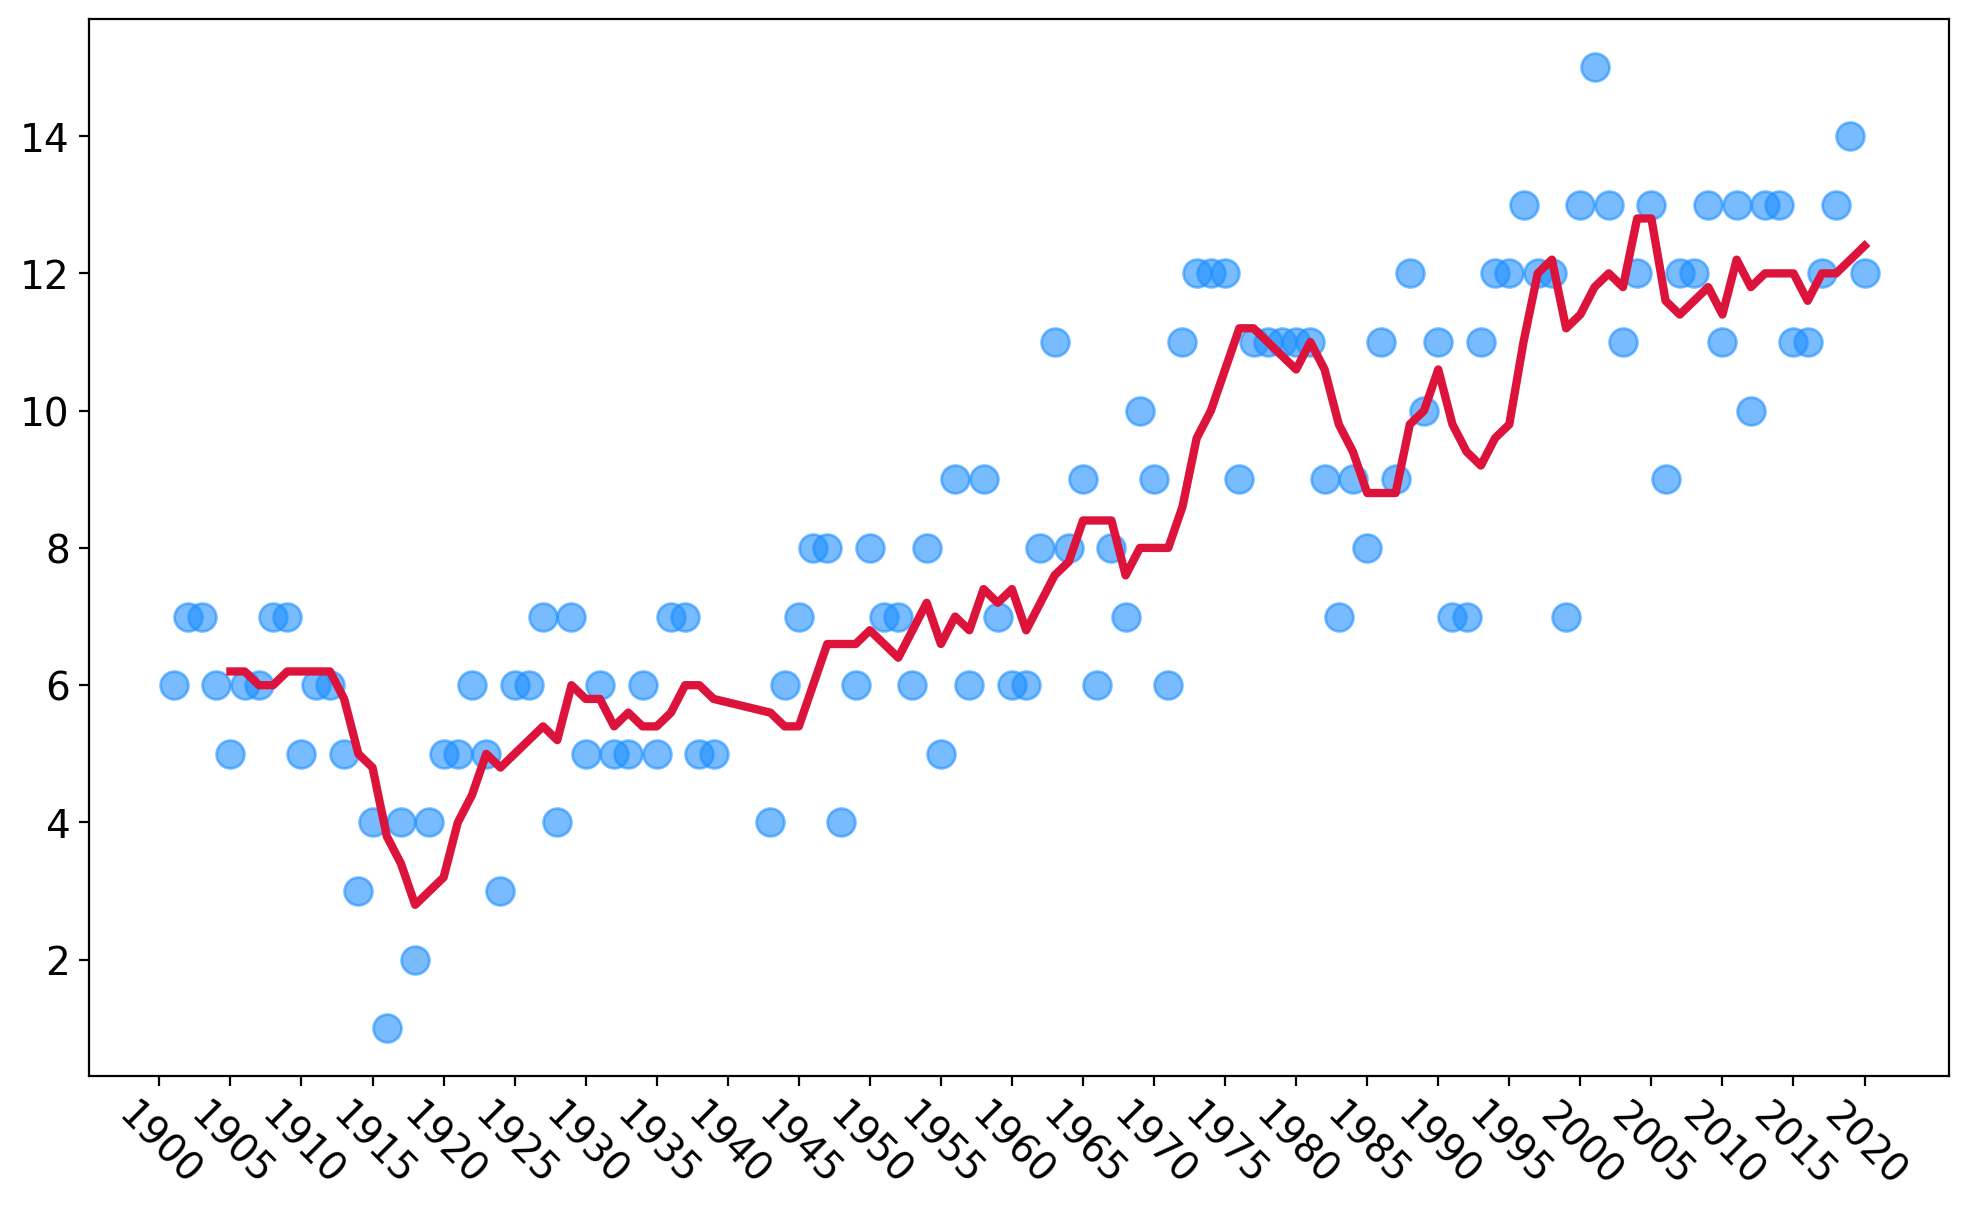

In [ ]:
# alpha=transparency, s=dot size

plt.figure(figsize=(12,7), dpi=200)

plt.xticks(year_scale,
           rotation=-45,
           fontsize=14)
plt.yticks(fontsize=14)


plt.scatter(x=time_series.index, 
            y=time_series, 
            color='dodgerblue',
            alpha=0.6,
            s=100)
plt.plot(time_series.index,
         rolling_time_series,
         color='crimson',
         linewidth=3)


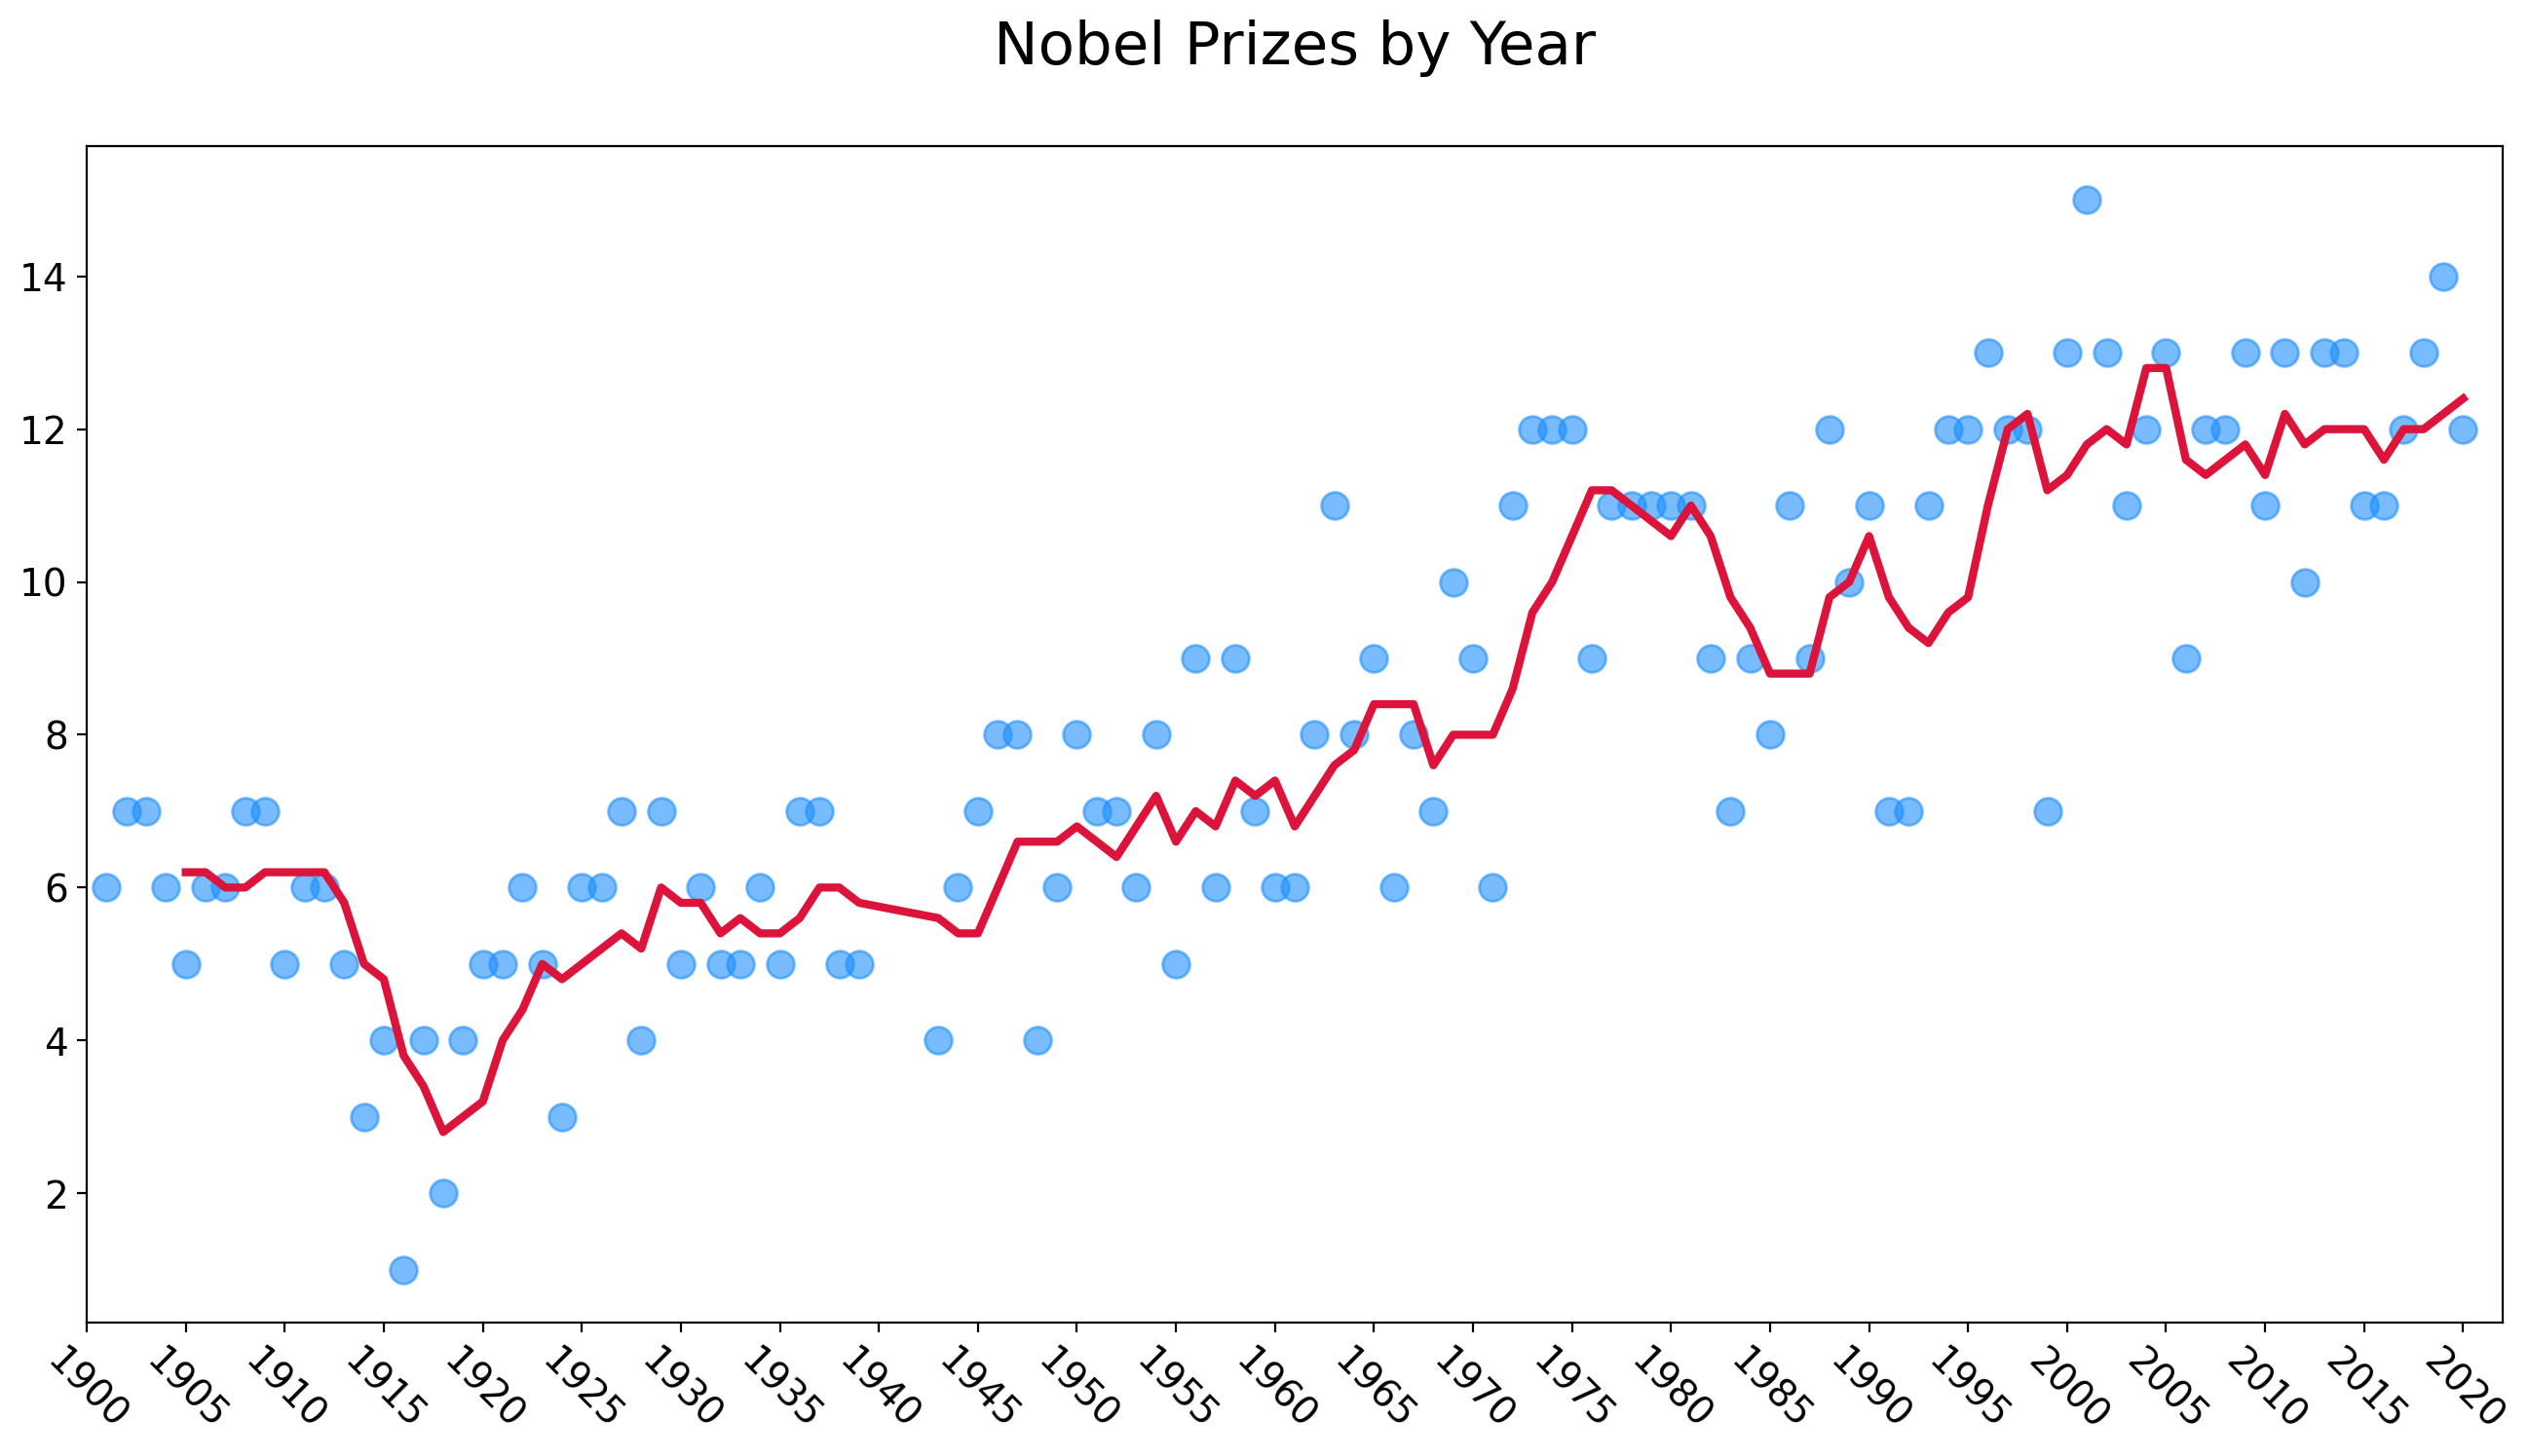

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prizes by Year\n',
          fontsize=22)
plt.xticks(year_scale,
           rotation=-45,
           fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2022)

ax.scatter(x=time_series.index, 
            y=time_series, 
            color='dodgerblue',
            alpha=0.6,
            s=100)
ax.plot(time_series.index,
         rolling_time_series,
         color='crimson',
         linewidth=3)


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [ ]:
prize_sharing = df_data.groupby('year').agg({'share_percent':pd.Series.mean})
rolling_prize_sharing = prize_sharing.rolling(window=5).mean()

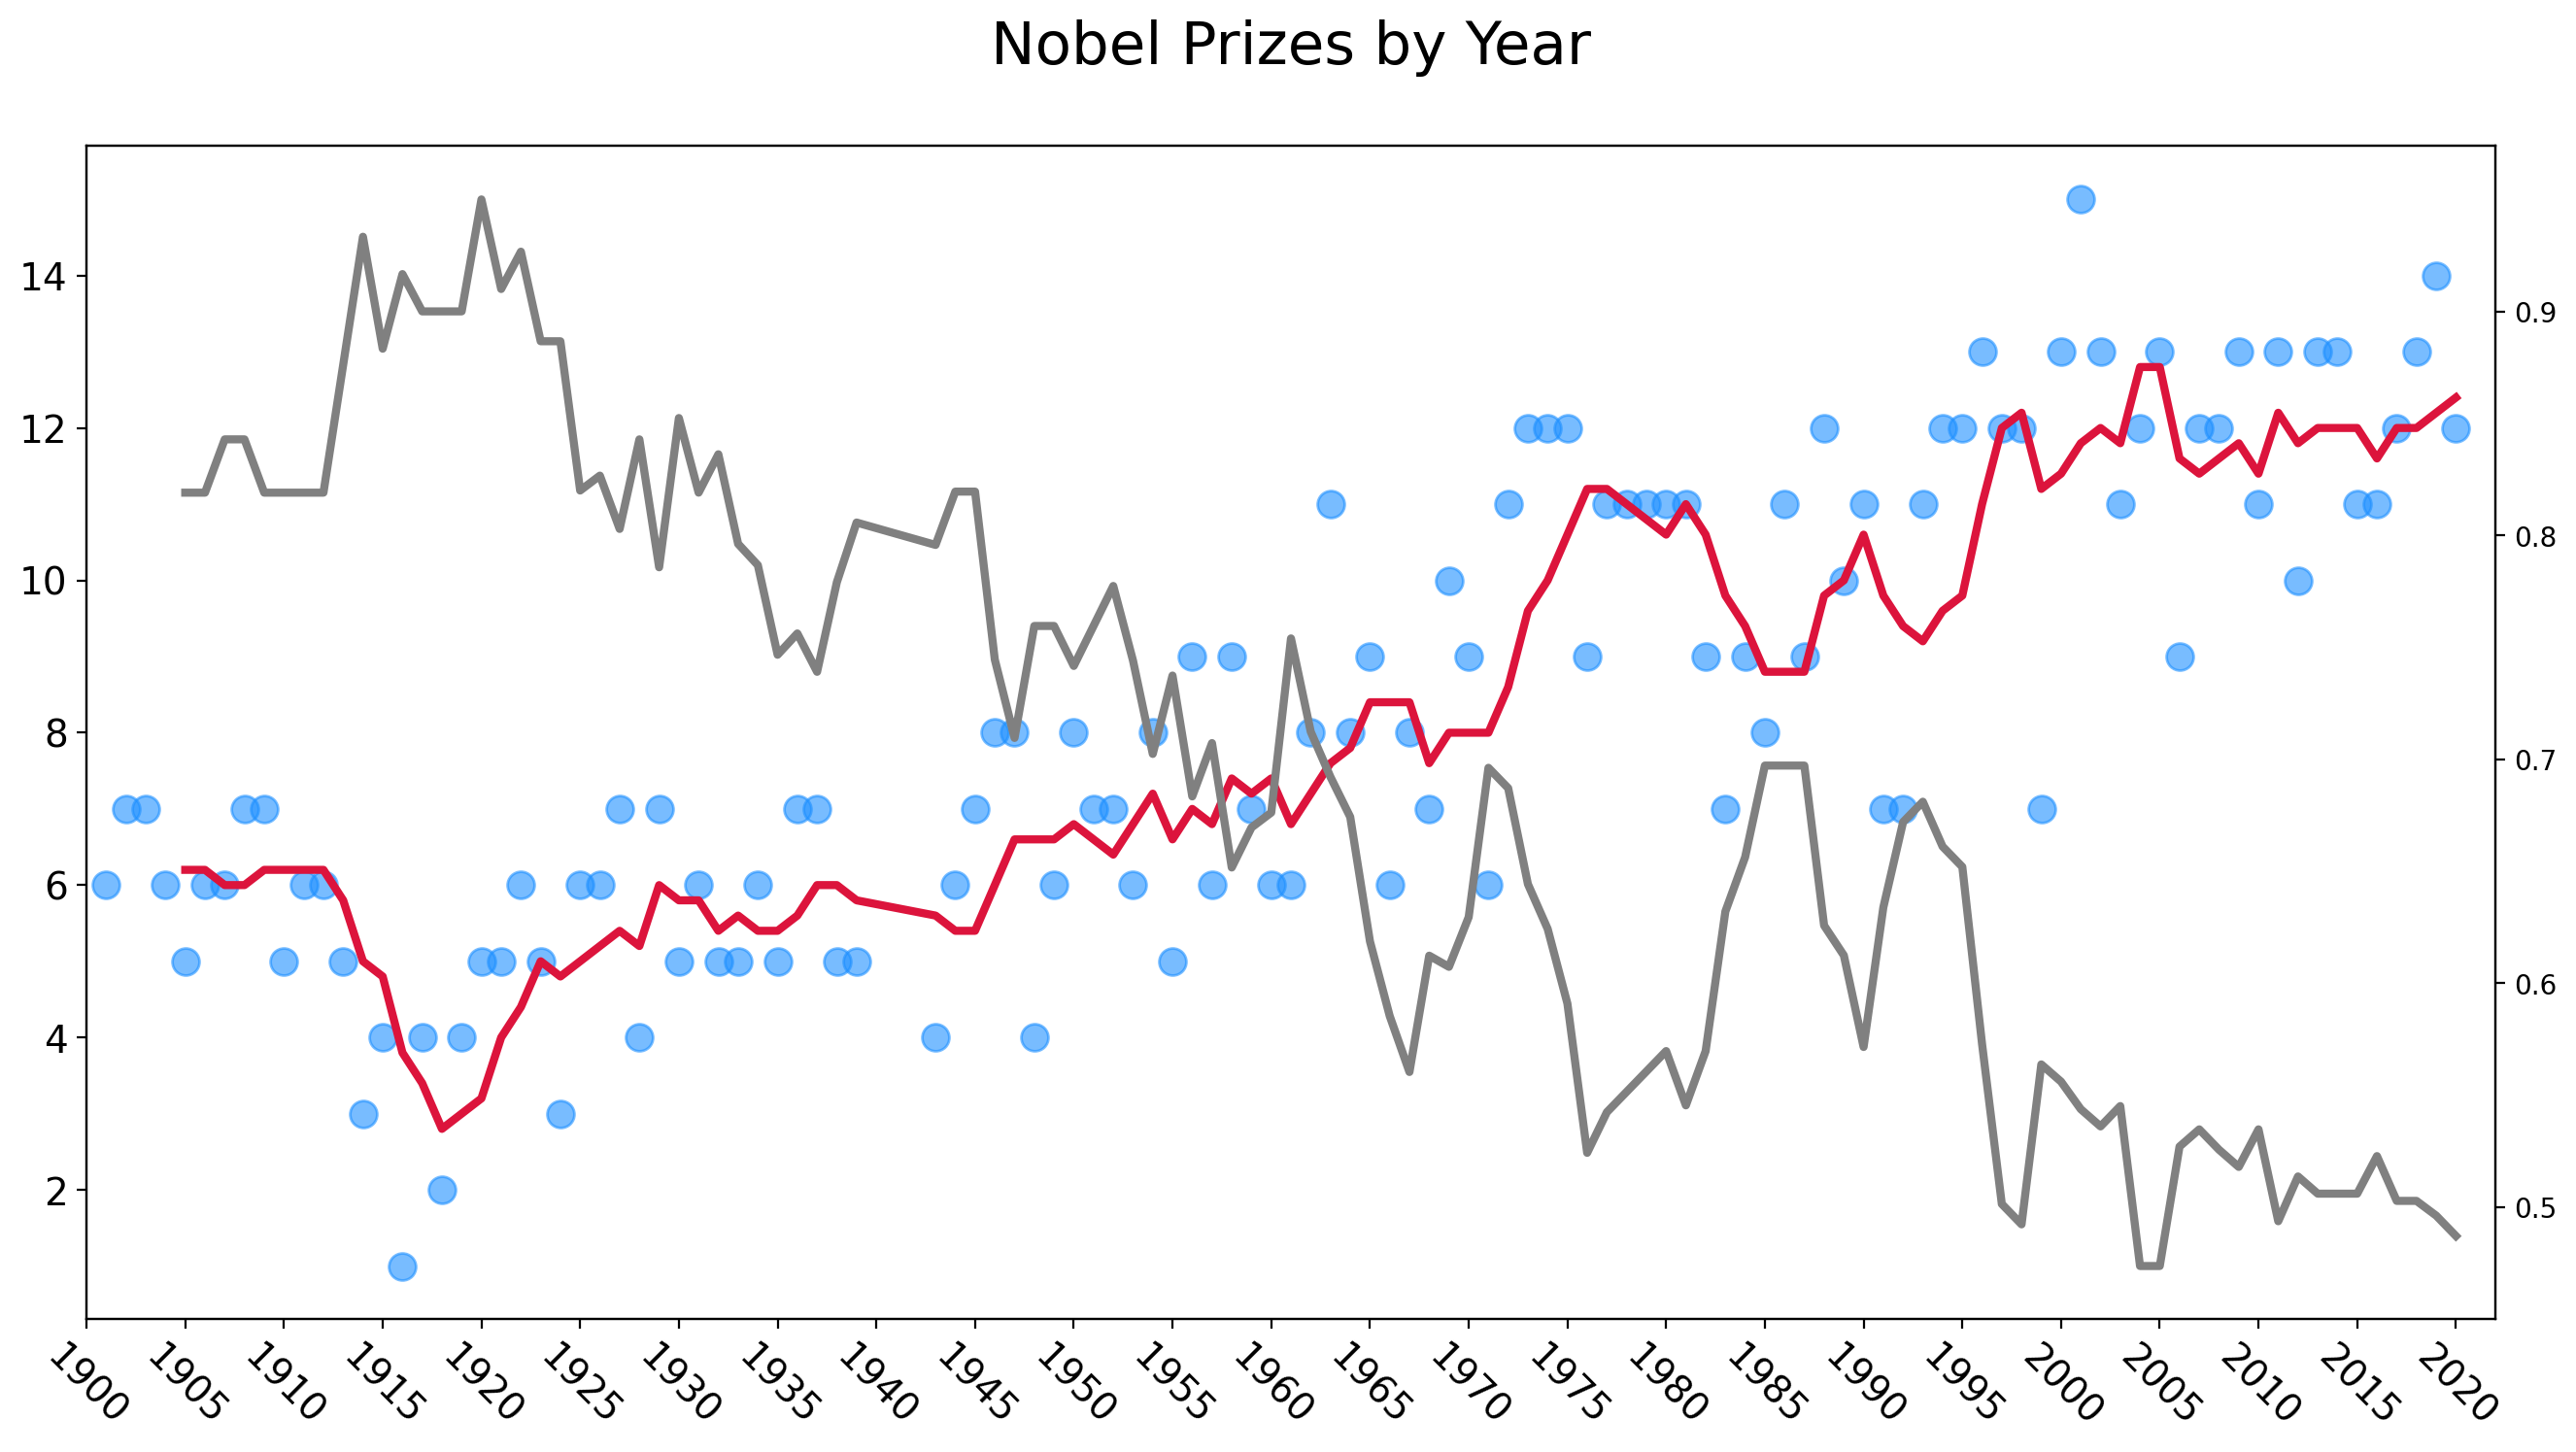

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prizes by Year\n',
          fontsize=22)
plt.xticks(year_scale,
           rotation=-45,
           fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2022)

ax.scatter(x=time_series.index, 
            y=time_series, 
            color='dodgerblue',
            alpha=0.6,
            s=100)
ax.plot(time_series.index,
         rolling_time_series,
         color='crimson',
         linewidth=3)

ax2 = ax.twinx() # copies x-axis, allows us to have different y axis

ax2.plot(prize_sharing.index,
         rolling_prize_sharing,
         c='grey',
         linewidth=3)



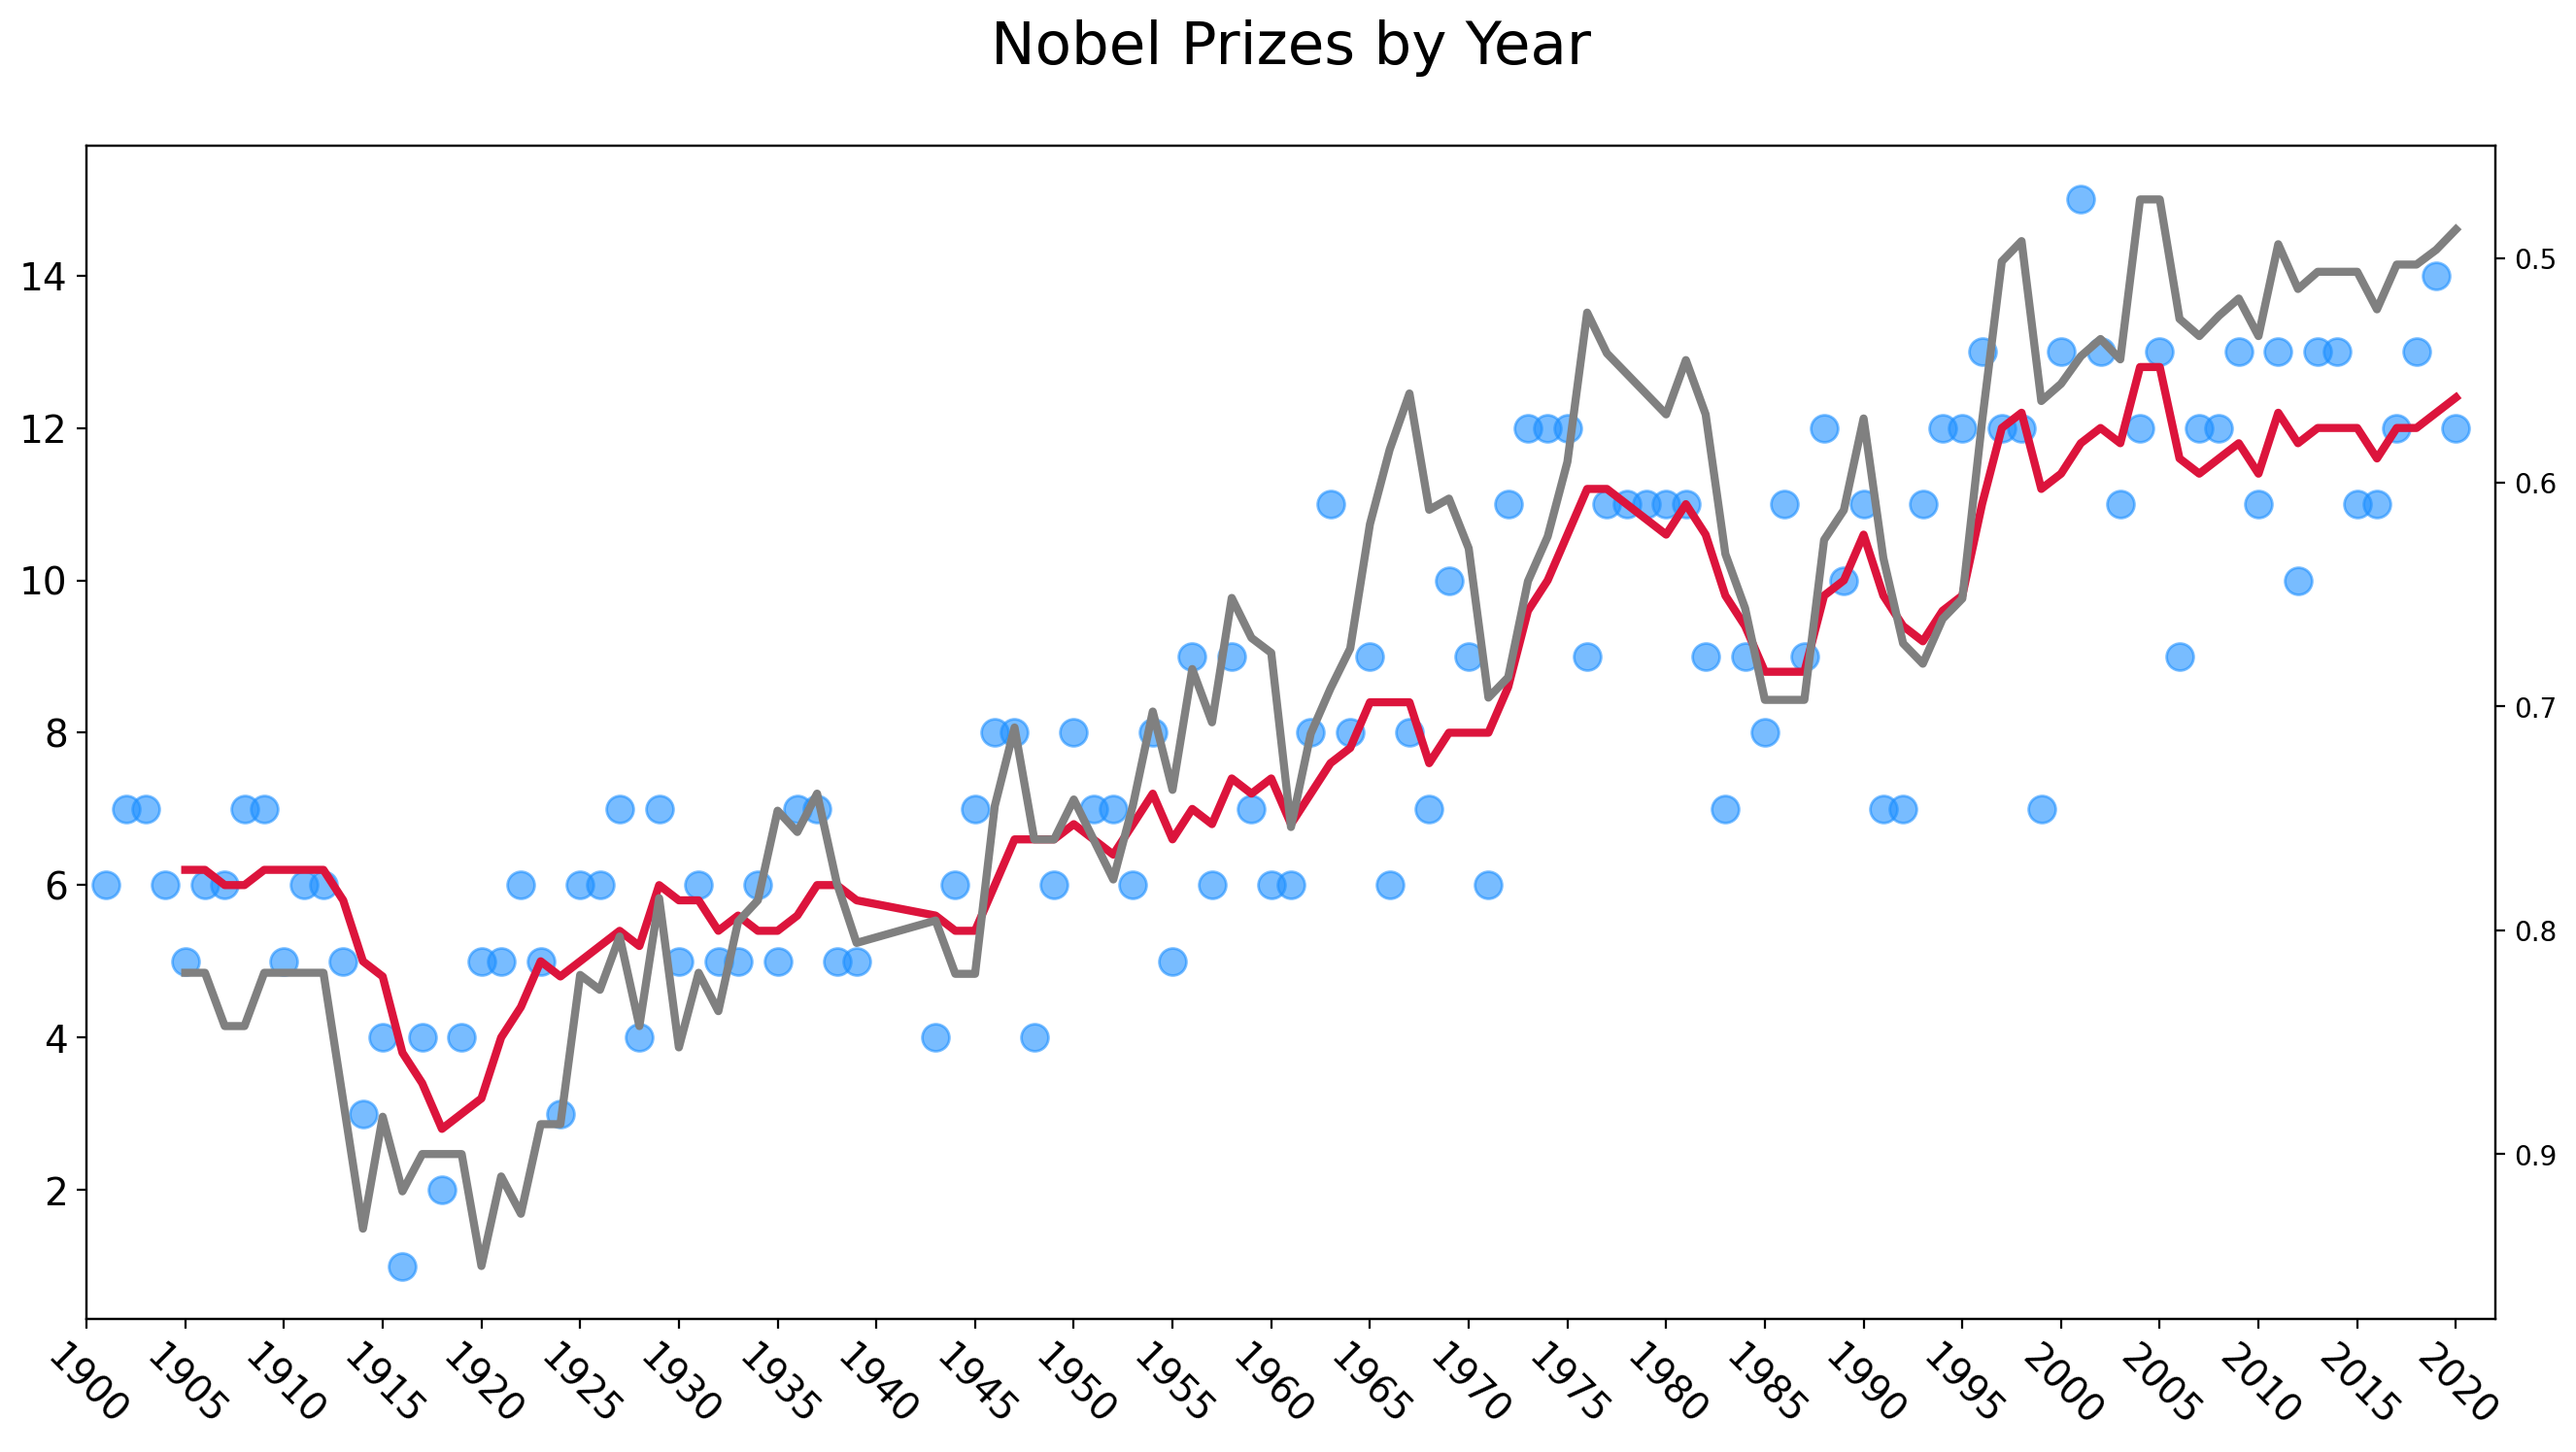

In [ ]:
# Graph above shows an obvious relationship between number of awards given out and the share percentage.
# Let's invert the axis for the share graph to match the lines up better (less to more awards, less to more sharing)
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prizes by Year\n',
          fontsize=22)
plt.xticks(year_scale,
           rotation=-45,
           fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2022)

ax.scatter(x=time_series.index, 
            y=time_series, 
            color='dodgerblue',
            alpha=0.6,
            s=100)
ax.plot(time_series.index,
         rolling_time_series,
         color='crimson',
         linewidth=3)

ax2 = ax.twinx() 
ax2.invert_yaxis() # Inverts the share percent axis, making it congruent with the award number axis

ax2.plot(prize_sharing.index,
         rolling_prize_sharing,
         c='grey',
         linewidth=3)

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [ ]:
list = ['birth_country', 'birth_country_current', 'organization_country']
for country in list:
  print(df_data.groupby(country).agg({'prize':pd.Series.count}))

                                          prize
birth_country                                  
Argentina                                     4
Australia                                    10
Austria                                      15
Austria-Hungary (Austria)                     1
Austria-Hungary (Bosnia and Herzegovina)      1
...                                         ...
Venezuela                                     1
Vietnam                                       1
W&uuml;rttemberg (Germany)                    1
West Germany (Germany)                        5
Yemen                                         1

[124 rows x 1 columns]
                          prize
birth_country_current          
Algeria                       2
Argentina                     4
Australia                    10
Austria                      18
Azerbaijan                    1
...                         ...
United States of America    281
Venezuela                     1
Vietnam                       1


In [ ]:
organizations = df_data[df_data.laureate_type == 'Organization']
organizations.shape

(32, 17)

In [ ]:
organizations

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


In [ ]:
# birth_country has too many multiples and weird data (europe changing nations, etc.)
# organization_country ironically is only filled in for individuals!
# birth_country_current is the Goldilocks

top_20_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize':pd.Series.count})
top_20_countries.sort_values('prize', ascending=False, inplace=True)
top_20_countries = top_20_countries[:20]
top_20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [ ]:
# Had to reverse y-axis to get it like hers (since the [-20:] is ugly)
fig = px.bar(top_20_countries,
             orientation='h',
             y='birth_country_current',
             x='prize')
fig.update_yaxes(autorange="reversed")
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [ ]:
countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize':pd.Series.count,'ISO':pd.Series.unique})
countries.sort_values('prize', ascending=False)

,birth_country_current,prize,ISO
74,United States of America,281,USA
73,United Kingdom,105,GBR
26,Germany,84,DEU
25,France,57,FRA
67,Sweden,29,SWE
...,...,...,...
32,Iceland,1,ISL
47,Madagascar,1,MDG
34,Indonesia,1,IDN
36,Iraq,1,IRQ


In [ ]:
# Must pass in an ISO for locations in order to work with this ready loaded world map choropleth
fig = px.choropleth(countries, locations="ISO",
                    color="prize",
                    hover_name="birth_country_current",
                    color_continuous_scale=px.colors.sequential.YlGn)
fig.show()

In [ ]:
# Her Way:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [ ]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [ ]:
# My way without the hint, doing it in one step
# Problem is this only has the category counts, not the total country counts, so the graph isn't sorted/ordered properly
detailed_country = df_data.groupby(['birth_country_current','category'], as_index=False).agg({'prize':pd.Series.count})
detailed_country.sort_values('prize', ascending=False, inplace=True)

In [ ]:

fig = px.bar(detailed_country,
             orientation='h',
             y='birth_country_current',
             x='prize',
             color='category',
             width=1400,
             height=800,)
fig.update_yaxes(range=[-1,20])

fig.show()

In [ ]:
# My way, with hint, the two step process:
# narrow it down to 20 countries here, since category df will have multiple rows for a single country, harder to slice
total_prize_country = df_data.groupby('birth_country_current', as_index=False).agg({'prize':pd.Series.count})
total_prize_country = total_prize_country.sort_values('prize')[-20:]

In [ ]:
category_prize_country = df_data.groupby(['birth_country_current','category'], as_index=False).agg({'prize':pd.Series.count})


In [ ]:
# Even with different amount of rows, can still merge on the country column
# Each table had a column named 'prize', so they got auto-renamed to prize_x and prize_y
# Order matters for merging. I used the total prize df first, my columns got split. She did the reverse, came out neater
df_merged = pd.merge(total_prize_country, category_prize_country, on='birth_country_current')
df_merged.rename(columns={"prize_x": "total_prize", "prize_y": "category_prize"}, inplace=True)

In [ ]:
df_merged

,birth_country_current,total_prize,category,category_prize
0,Belgium,9,Chemistry,1
1,Belgium,9,Literature,1
2,Belgium,9,Medicine,3
3,Belgium,9,Peace,3
4,Belgium,9,Physics,1
...,...,...,...,...
105,United States of America,281,Economics,49
106,United States of America,281,Literature,10
107,United States of America,281,Medicine,78
108,United States of America,281,Peace,19


In [ ]:
# Just for aethestics, make the column order better:
new_cols = ["birth_country_current","category","category_prize","total_prize"]
df_merged = df_merged[new_cols]
#or
# df_merged = df_merged.reindex(columns=new_cols)
df_merged

,birth_country_current,category,category_prize,total_prize
0,Belgium,Chemistry,1,9
1,Belgium,Literature,1,9
2,Belgium,Medicine,3,9
3,Belgium,Peace,3,9
4,Belgium,Physics,1,9
...,...,...,...,...
105,United States of America,Economics,49,281
106,United States of America,Literature,10,281
107,United States of America,Medicine,78,281
108,United States of America,Peace,19,281


In [ ]:
# arranging it above through proper ascending/sorted, no need for the reversing of the yaxis or window parameters
fig = px.bar(df_merged,
             orientation='h',
             y='birth_country_current',
             x='category_prize',
             color='category'
            #  width=1400,
            #  height=600,
            )
# fig.update_yaxes(autorange='reversed')

fig.show()

In [ ]:
# Her Way:
top_countries = df_data.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})
 
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

In [ ]:
# Her Way:
cat_country = df_data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
display(merged_df)
# Note: order matter with merging df in terms of column placement
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)

,birth_country_current,category,prize_x,prize_y
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
105,India,Literature,2,9
106,India,Medicine,2,9
107,India,Chemistry,1,9
108,India,Peace,1,9


In [ ]:
# Her Way:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [ ]:
# Since year and share_percent are the only numeric Series, running .cumsum() on the df_data can only total those, not prizes.
df_data.groupby(['birth_country_current']).cumsum()

,year,share_percent
0,1901,1.00
1,1901,1.00
2,1901,1.00
3,3802,1.50
4,1901,0.50
...,...,...
957,204783,62.42
958,-1,NaN
959,557387,149.00
960,164327,52.83


In [ ]:
# First need to count the prizes, turning it into a numeric, then can run .cumsum() on it.
year_country_total = df_data.groupby(['year','birth_country_current'], as_index=False).agg({'prize':pd.Series.count})
year_country_total

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1
...,...,...,...
622,2019,United States of America,3
623,2020,France,1
624,2020,Germany,1
625,2020,United Kingdom,2


In [ ]:
# Help from google: df[['Type', 'Sales']].groupby('Type').cumsum(), had to modify it
# This .cumsum() works since the table it already ordered by year, ascending from earliest
cumulative = year_country_total.groupby(['birth_country_current']).cumsum()
display(cumulative)

# Note: cumsum() added up the years too, but we don't care. Just pull the 'prize' info out and add it to the previous table
year_country_total['cumulative_prize'] = cumulative['prize']

,year,prize
0,1901,2
1,1901,1
2,1901,1
3,1901,1
4,1901,1
...,...,...
622,173472,274
623,80181,57
624,123165,84
625,131796,105


In [ ]:
year_country_total

,year,birth_country_current,prize,cumulative_prize
0,1901,France,2,2
1,1901,Germany,1,1
2,1901,Netherlands,1,1
3,1901,Poland,1,1
4,1901,Switzerland,1,1
...,...,...,...,...
622,2019,United States of America,3,274
623,2020,France,1,57
624,2020,Germany,1,84
625,2020,United Kingdom,2,105


In [ ]:

fig = px.line(year_country_total,
              x='year',
              y='cumulative_prize',
              color='birth_country_current',
              hover_name='birth_country_current')

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Prizes')
fig.show()

In [ ]:
# Her Way:
# what is going on with cumulative_prizes! lol, double groupby with sum() and cumsum(), then need to reset index! Crazy stuff

# She is turning the prizes into a numeric by counting after grouping. By not specifying an .agg({'prize'}), it counts everything!
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')
display(prize_by_year)
# Sorts it by year and narrows down the columns (since it counted all the columns earlier)
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
display(prize_by_year)

# grouping and .sum make it so the countries are the main group, subgroup is years, and the the prizes for the years
cumulative_prizes1 = prize_by_year.groupby(by=['birth_country_current','year']).sum()
display(cumulative_prizes1)
print("\n-----\n")
# By adding the second groupby, and specifying the level as [0], which is the first column (the country), nonw she can do .cumsum()
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
display(cumulative_prizes)
# Her method of grouping left the table without an index; this adds it back
cumulative_prizes.reset_index(inplace=True) 
display(cumulative_prizes)

,birth_country_current,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO,share_percent
118,France,1901,2,2,1,2,2,2,2,2,2,2,0,0,0,2,2
346,Poland,1901,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
159,Germany,1901,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
312,Netherlands,1901,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
440,Switzerland,1901,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,Austria,2019,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
221,Germany,2020,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
622,United States of America,2020,7,7,7,7,7,7,7,7,7,7,6,6,6,7,7
533,United Kingdom,2020,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2


,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
70,2019,Canada,1
533,2020,United Kingdom,2
221,2020,Germany,1
622,2020,United States of America,7


prize
birth_country_current    year       
Algeria                  1957      1
                         1997      1
Argentina                1936      1
                         1947      1
                         1980      1
...                              ...
United States of America 2020      7
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]


-----



prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# Note her legend is alphabetized, which doesn't match the graphs! The top 5 aren't even on the list!!

In [ ]:
# For once, I think my method and results were better!! :D

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
share_percent              0
dtype: int64

In [ ]:
# Note: 255 missing values for 'organization_name'!!! Definitely affects the data
organization_total = df_data.groupby('organization_name', as_index=False).agg({'prize':pd.Series.count})
top_20_organizations = organization_total.sort_values('prize')[-20:]


In [ ]:
fig = px.bar(top_20_organizations,
             x='prize',
             y='organization_name',
             orientation='h',
             color='prize',
             title='Nobel Prizes by Institution',
             hover_name='organization_name')
fig.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Institution')

fig.show()

In [ ]:
# Her Way:
top20_orgs = df_data.organization_name.value_counts()[:20]
print(top20_orgs)
top20_orgs.sort_values(ascending=True, inplace=True)

University of California                        40
Harvard University                              29
Stanford University                             23
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           20
University of Cambridge                         18
Columbia University                             17
California Institute of Technology (Caltech)    17
Princeton University                            15
Max-Planck-Institut                             13
Rockefeller University                          13
University of Oxford                            12
MRC Laboratory of Molecular Biology             10
Yale University                                  9
Cornell University                               8
Bell Laboratories                                8
Institut Pasteur                                 7
Harvard Medical School                           7
London University                                7
Sorbonne University            

In [ ]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline_r,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [ ]:
# Don't need to make an agg, can just use the value_counts() like she did above
# NOTE: sort_values doesn't need a input if there is only one column to sort
top_20_cities = df_data.organization_city.value_counts()[:20]
top_20_cities.sort_values(ascending=True, inplace=True)

In [ ]:
city_bar = px.bar(x = top_20_cities.values,
                 y = top_20_cities.index,
                 orientation='h',
                 color=top_20_cities.values,
                 color_continuous_scale=px.colors.sequential.haline_r,
                 title='Top 20 Research Cities by Number of Prizes')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='City',
                      coloraxis_showscale=False)
city_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [ ]:
top_birth_cities = df_data.birth_city.value_counts()[:20]
top_birth_cities.sort_values(ascending=True, inplace=True)

In [ ]:
city_bar = px.bar(x = top_birth_cities.values,
                 y = top_birth_cities.index,
                 orientation='h',
                 color=top_birth_cities.values,
                 color_continuous_scale=px.colors.sequential.matter,
                 title='Where were the Nobel Laureates born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Birth City',
                      coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [ ]:
# Changing from birth_country_current to organization_country doesn't change number of prizes, even tho many NaN in org_country
# Number of rows is very different tho!
# Data changes because the award gets credited to the country they were born in, not the country they conducted the research

In [ ]:
df_sunburst = df_data.groupby(['birth_country_current', 'organization_city', 'organization_name'], as_index=False).agg({'prize':pd.Series.count})
display(df_sunburst.prize.sum())
df_sunburst

703

,birth_country_current,organization_city,organization_name,prize
0,Algeria,Paris,Collège de France,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Argentina,Cambridge,MRC Laboratory of Molecular Biology,1
3,Australia,Brighton,University of Sussex,1
4,Australia,Canberra,Australian National University,1
...,...,...,...,...
427,United States of America,Waltham MA,Brandeis University,1
428,United States of America,"Washington, DC",US Naval Research Laboratory,1
429,United States of America,Weston Creek,Australian National University,1
430,United States of America,"Worcester, MA",University of Massachusetts Medical School,1


In [ ]:
df_sunburst.sample(49)

,birth_country_current,organization_city,organization_name,prize
279,Sweden,Lidingö-Stockholm,Swedish Gas-Accumulator Co.,1
215,Netherlands,Groningen,University of Groningen,1
64,Denmark,Copenhagen,Copenhagen University,3
248,Poland,"San Diego, CA",University of California,1
34,Brazil,London,University College London,1
326,United Kingdom,London,Department of Scientific and Industrial Research,1
222,New Zealand,London,London University,1
397,United States of America,"New York, NY",Rockefeller Institute for Medical Research,2
392,United States of America,"New York, NY",Bell Laboratories,1
380,United States of America,"Houston, TX",University of Texas,1


In [ ]:
fig = px.sunburst(df_sunburst,
                  path=['birth_country_current', 'organization_city', 'organization_name'],
                  values='prize',
                  title='Where do Discoveries Take Place?'
                   )
 
fig.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
fig.show()


In [ ]:
df_sunburst1 = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize':pd.Series.count})
display(df_sunburst1.prize.sum())
df_sunburst1

703

,organization_country,organization_city,organization_name,prize
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1
...,...,...,...,...
286,United States of America,"West Lafayette, IN",Purdue University,2
287,United States of America,"Wilmington, DE",Du Pont,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1
289,United States of America,"Worcester, MA",University of Massachusetts Medical School,1


In [ ]:
df_sunburst1.sample(49)

,organization_country,organization_city,organization_name,prize
192,United States of America,"Batavia, IL",Fermi National Accelerator Laboratory,1
105,Japan,Kyoto,Kyoto Sangyo University,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1
281,United States of America,"Tempe, AZ",Arizona State University,1
50,France,Sèvres,Bureau International des Poids et Mesures (Int...,1
23,Denmark,Aarhus,Aarhus University,1
37,France,Paris,Sorbonne University,7
28,Denmark,Copenhagen,Polytechnic Institute,1
124,Norway,Oslo,University of Oslo,3
109,Japan,Nagoya,Nagoya University,2


In [ ]:
fig = px.sunburst1(df_sunburst1,
                  path=['organization_country', 'organization_city', 'organization_name'],
                  values='prize',
                  title='Where do Discoveries Take Place?'
                   )
 
fig.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
fig.show()


In [ ]:
# Super cool graphic, you can click on the center choices and it expands!
# The graph changes depending on the groupby (organization_country instead of birth_country_current)
# There were plenty of NaN in the category, so not sure how the totals are accurate.
# TBH, the data set isn't very clean - some areas filled out, some not. Hard to agg

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [ ]:
df_data.birth_date.dt.year

0     1,852.00
1     1,839.00
2     1,854.00
3     1,822.00
4     1,828.00
        ...   
957   1,949.00
958        NaN
959   1,965.00
960   1,952.00
961   1,931.00
Name: birth_date, Length: 962, dtype: float64

In [ ]:
df_data['laureate_age'] = (df_data.year - df_data.birth_date.dt.year)

In [ ]:
# df_merged.rename(columns={"prize_x": "total_prize", "prize_y": "category_prize"}, inplace=True)
df_data.rename(columns={'laureate_age':'winning_age'}, inplace=True)

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [ ]:
# Note: .loc needs a double [[]] if calling something from a df
# Oldest Laureate:
display(df_data.loc[[df_data.winning_age.idxmax()]])
# Youngest Laureate
display(df_data.loc[[df_data.winning_age.idxmin()]])


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_percent,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [ ]:
df_data.winning_age

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: winning_age, Length: 962, dtype: float64

In [ ]:
# Some NaN since birth_dates weren't filled in (organizations?)
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [ ]:
# Didn't need this as Seaborn Histplot already counts for us
prize_by_age = df_data.winning_age.value_counts()
prize_by_age

63.00    35
56.00    34
61.00    33
60.00    31
64.00    30
         ..
86.00     1
90.00     1
17.00     1
96.00     1
97.00     1
Name: winning_age, Length: 64, dtype: int64

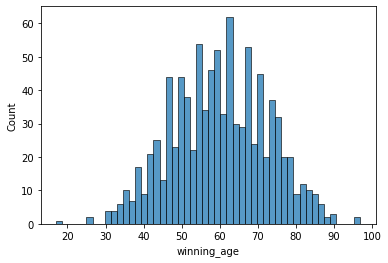

In [ ]:
# Higher bins means more granular = smaller range in age for a single bar
sns.histplot(df_data.winning_age,
             bins=50
            )


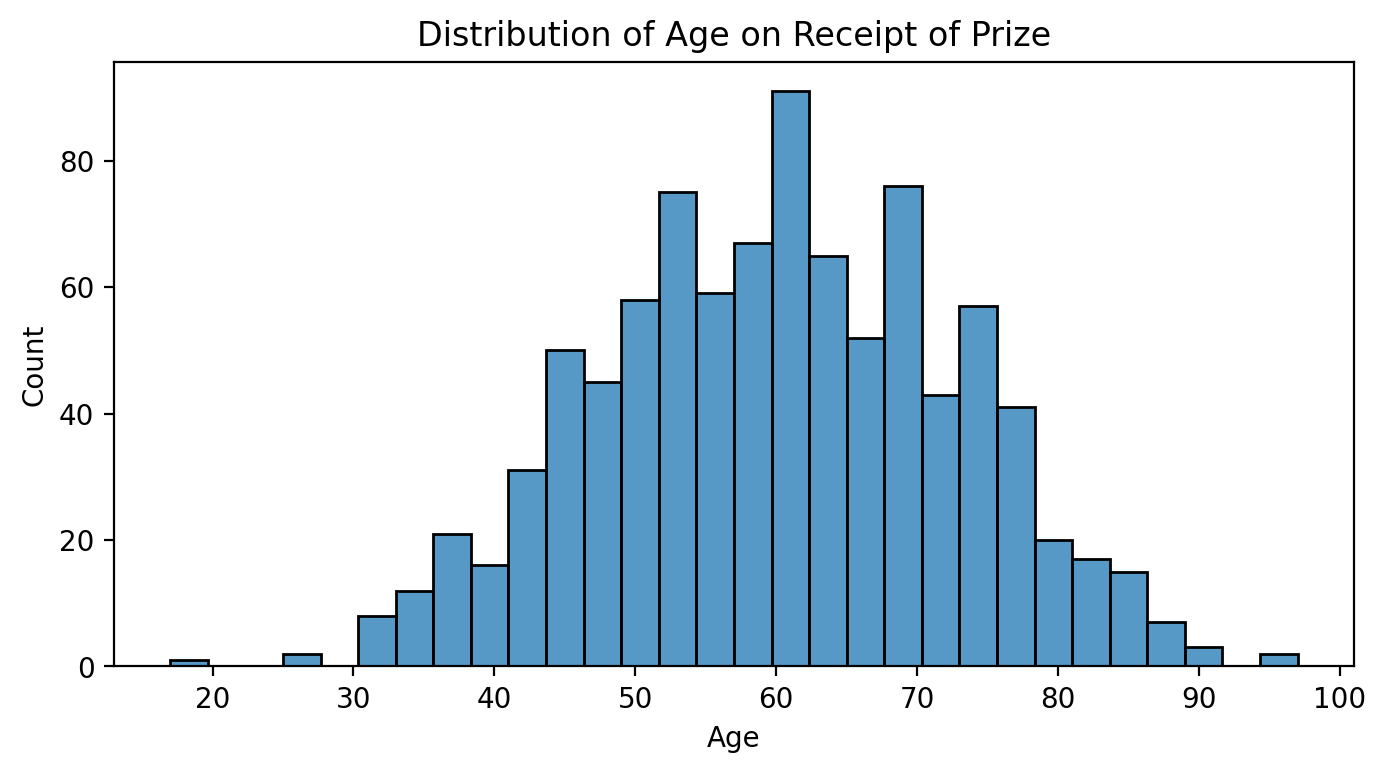

In [ ]:
# Her way:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


In [ ]:
avg_age_yearly = df_data.groupby('year', as_index=False).agg({'winning_age':pd.Series.mean})
avg_age_yearly

,year,winning_age
0,1901,61.00
1,1902,56.29
2,1903,52.00
3,1904,63.00
4,1905,59.20
...,...,...
112,2016,70.64
113,2017,74.09
114,2018,66.54
115,2019,66.43


In [ ]:
fig = px.scatter(avg_age_yearly,
                 x='year',
                 y='winning_age')
fig.show()


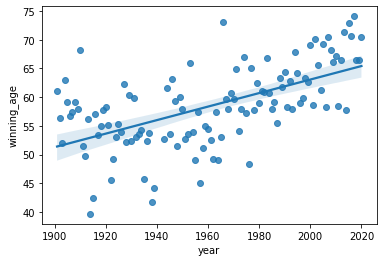

In [ ]:
# Trend looks upward, but difficult to tell exactly
# Let's get a regression line

sns.regplot(data=avg_age_yearly,
            x='year',
            y='winning_age')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



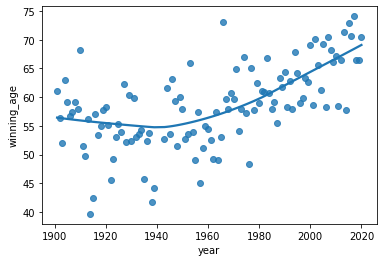

In [ ]:
# Lowess = Locally Weighted Linear Regression
sns.regplot(data=avg_age_yearly,
            x='year',
            y='winning_age',
            lowess=True)


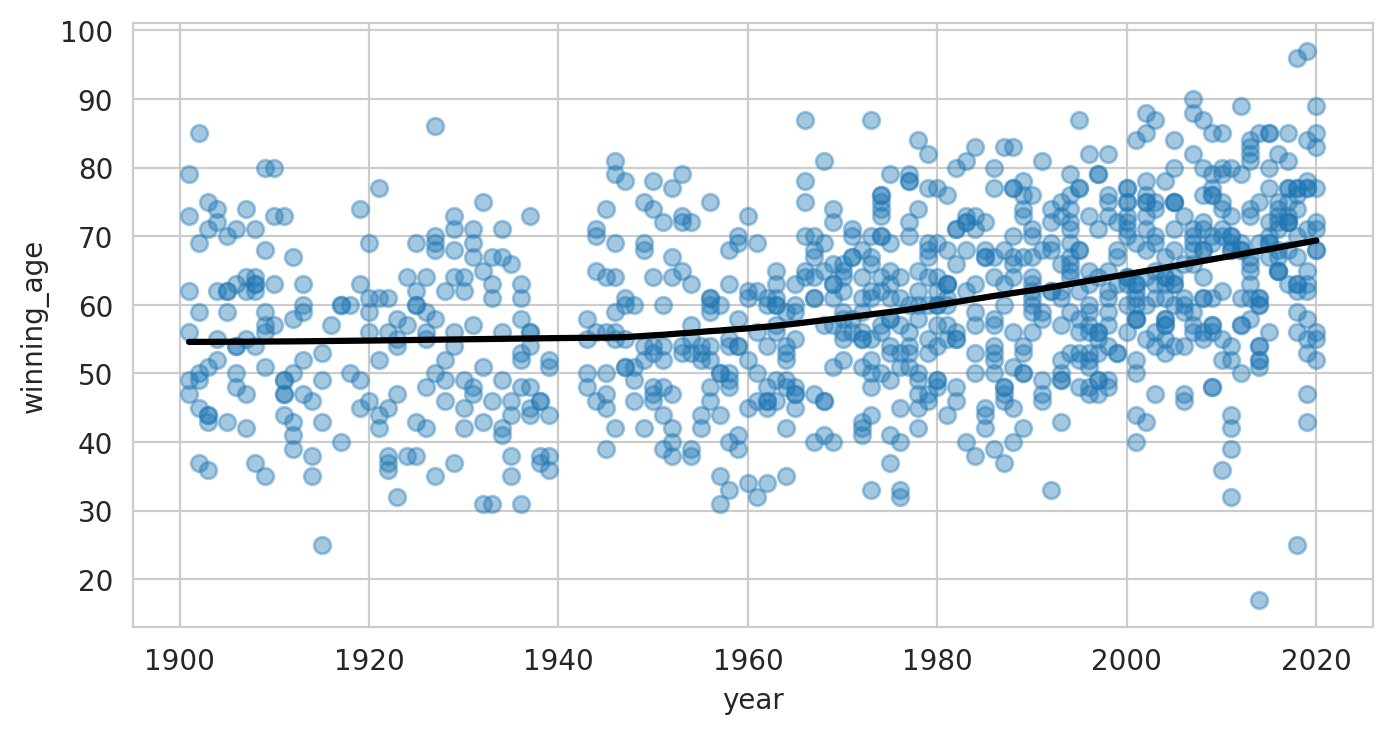

In [ ]:
# Her Way:
# Note: She uses the original dataset, no need to create a mean() Series like I did above
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

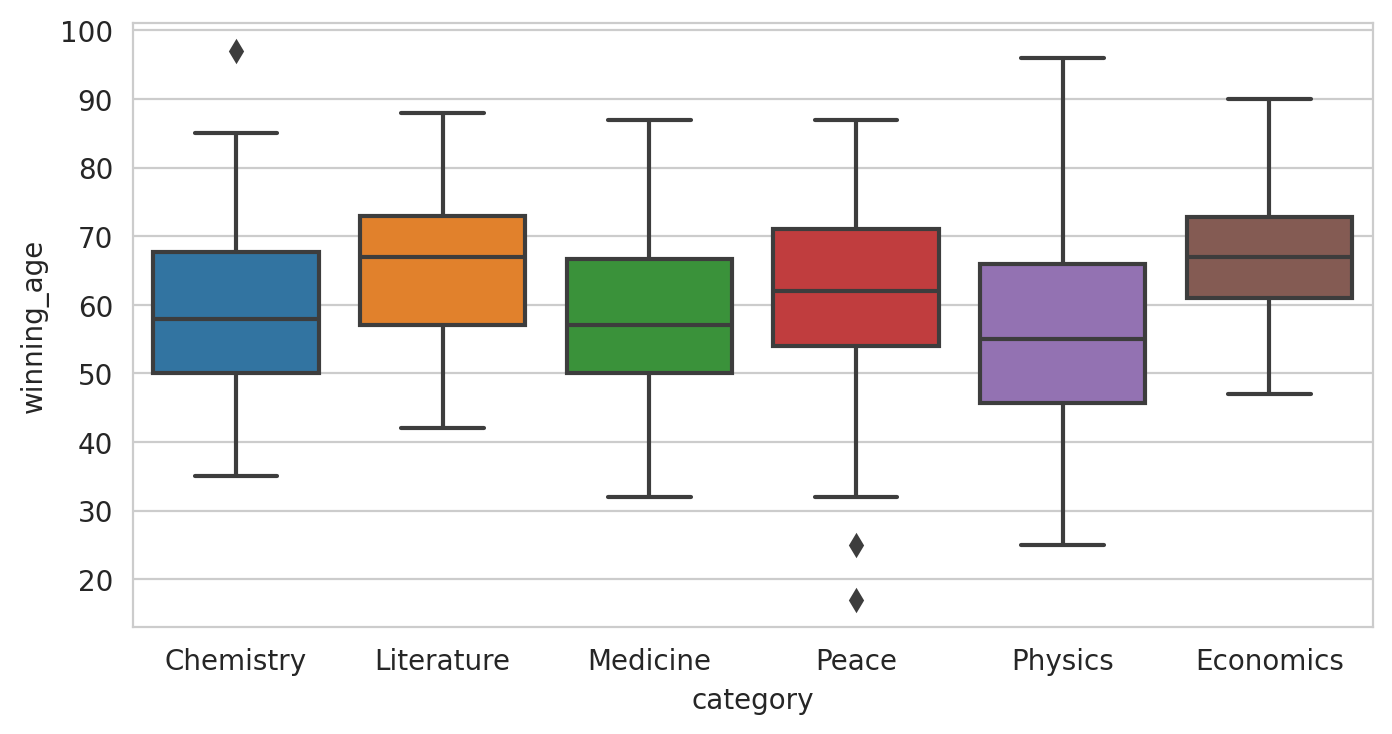

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age'
                )

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



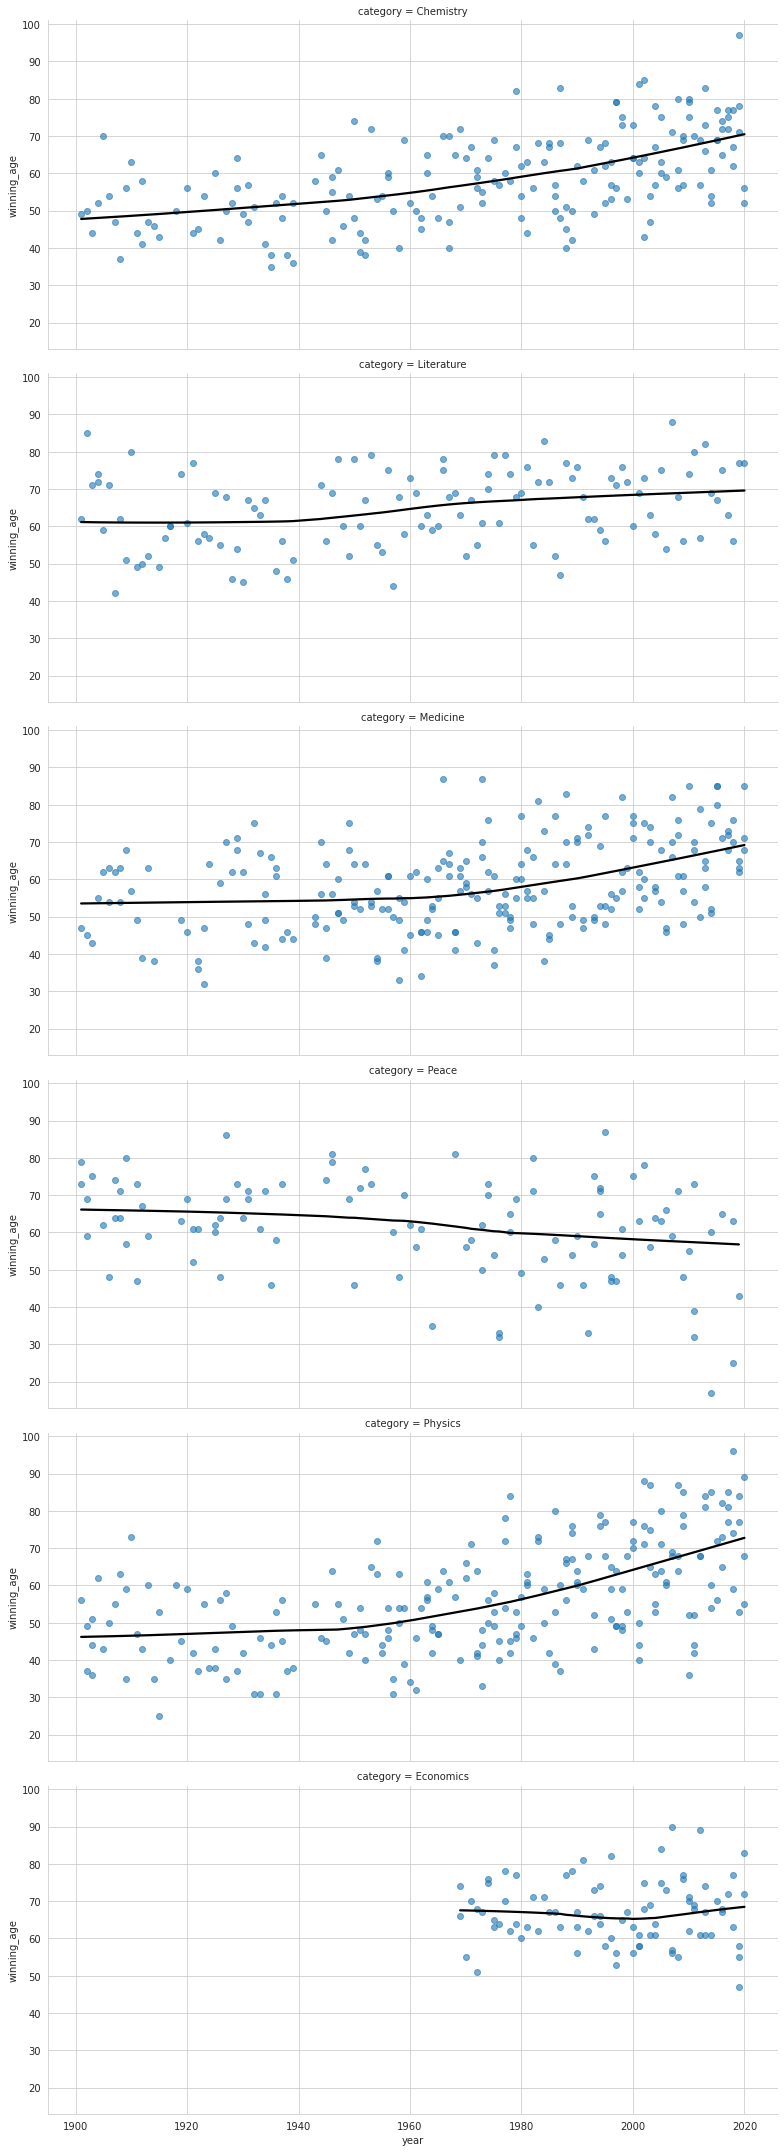

In [ ]:
# Using the 'row' split
# NOTE: figure(figsize) doesn't work here. Need to use 'aspect' to make it larger

# plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
               lowess=True,
               row='category',
               aspect=2.2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'})
plt.show()

<Figure size 2000x800 with 0 Axes>

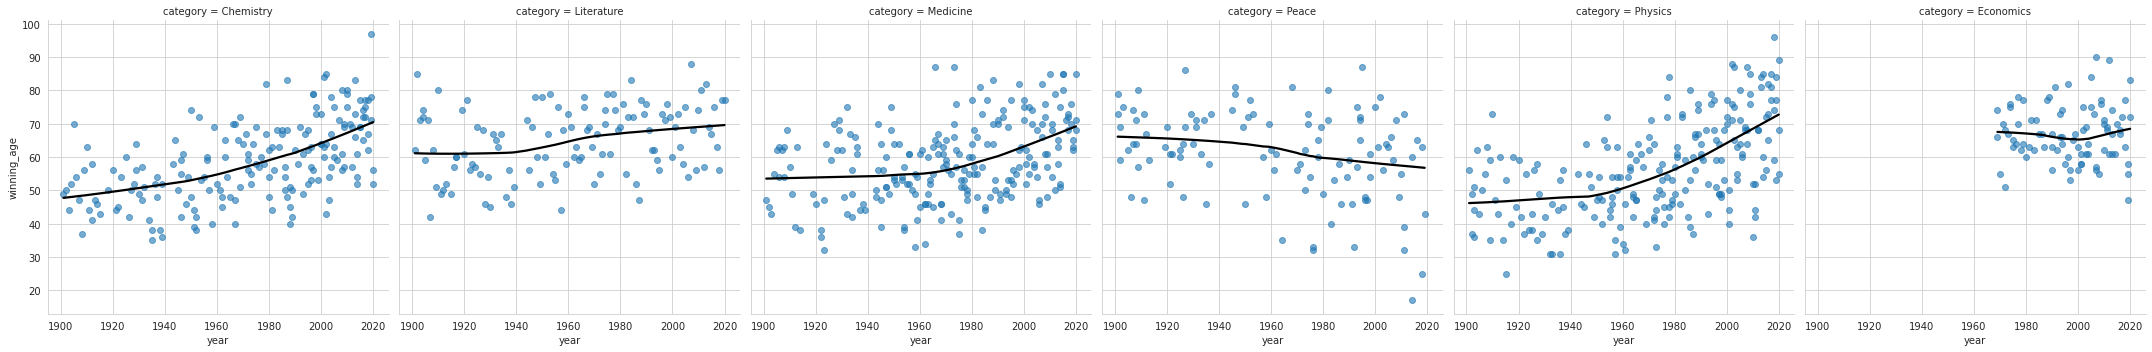

In [ ]:
# Using the 'col' split
# Smaller aspect since they are all in a line
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
               lowess=True,
               col='category',
               aspect=1,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'})
plt.show()

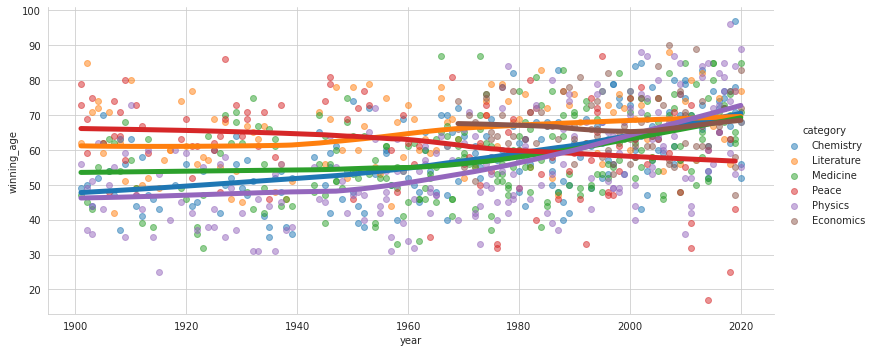

In [ ]:
# Using the 'hue' split
# Here we don't want to change the regression line color since it tells us which is which, but rather increase linewidth
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
               lowess=True,
               hue='category',
               aspect=2.2,
               scatter_kws = {'alpha': 0.5},
               line_kws={'linewidth': 5})
              #  line_kws = {'color': 'black'})
plt.show()


In [ ]:
# THE END!!! Wow, this assignment was packed!